<a href="https://colab.research.google.com/github/Nhat260501/Tuan5/blob/main/27_2_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt


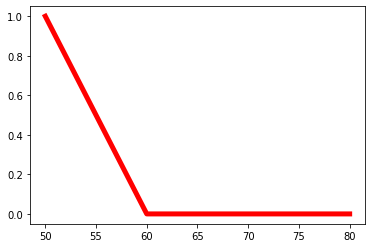

In [7]:
x = np.arange(50,81,1)
slow = fuzz.trimf(x, [50,50,60])
medium = fuzz.trimf(x, [50,50,70])
medium  = fuzz.trimf(x, [50,50,70])

plt.figure()
plt.plot(x,slow,'r',linewidth=5,label='slow')



16.54901960784313


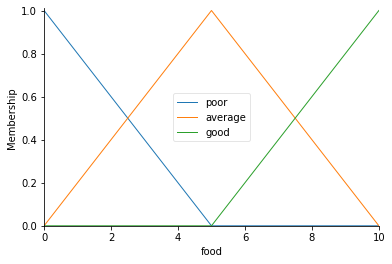

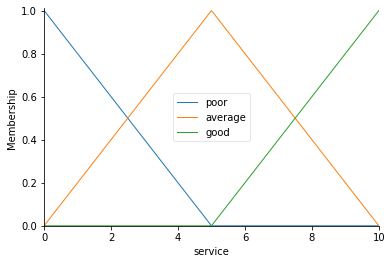

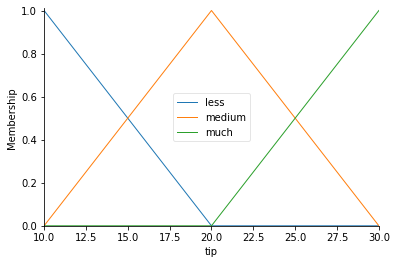

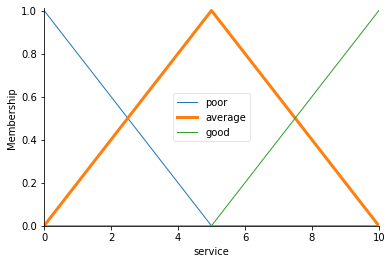

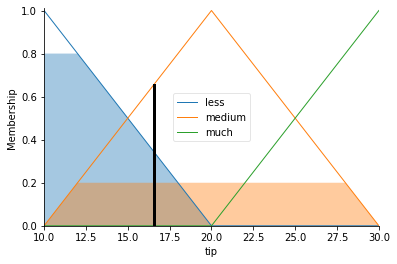

In [20]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
food=ctrl.Antecedent(np.arange(0,11,1),'food')
service=ctrl.Antecedent(np.arange(0,11,1),'service')
tip=ctrl.Consequent(np.arange(10,31,1),'tip')
food['poor']=fuzz.trimf(food.universe,[0,0,5])
food['average']=fuzz.trimf(food.universe,[0,5,10])
food['good']=fuzz.trimf(food.universe,[5,10,10])
service['poor']=fuzz.trimf(service.universe,[0,0,5])
service['average']=fuzz.trimf(service.universe,[0,5,10])
service['good']=fuzz.trimf(service.universe,[5,10,10])
tip['less']=fuzz.trimf(tip.universe,[10,10,20])
tip['medium']=fuzz.trimf(tip.universe,[10,20,30])
tip['much']=fuzz.trimf(tip.universe,[20,30,30])
food.view()
service.view()
tip.view()
service['average'].view()
rule1=ctrl.Rule(food['poor']&service['poor'], tip['less'])
rule2=ctrl.Rule(food['poor']&service['average'], tip['less'])
rule3=ctrl.Rule(food['poor']&service['good'], tip['medium'])
rule4=ctrl.Rule(food['average']&service['poor'], tip['less'])
rule5=ctrl.Rule(food['average']&service['average'], tip['medium'])
rule6=ctrl.Rule(food['average']&service['good'], tip['much'])
rule7=ctrl.Rule(food['good']&service['poor'], tip['medium'])
rule8=ctrl.Rule(food['good']&service['average'], tip['much'])
rule9=ctrl.Rule(food['good']&service['good'], tip['much'])
tipping_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
tipping=ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['food']=1
tipping.input['service']=1
tipping.compute()
print(tipping.output['tip'])
tip.view(sim=tipping)


93.33333333333331


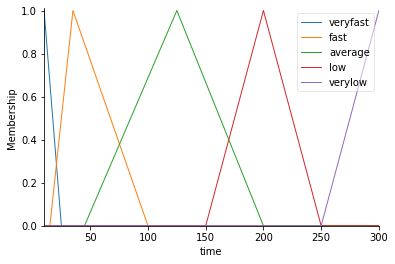

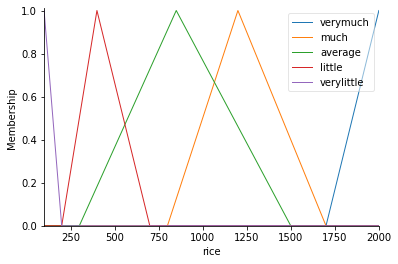

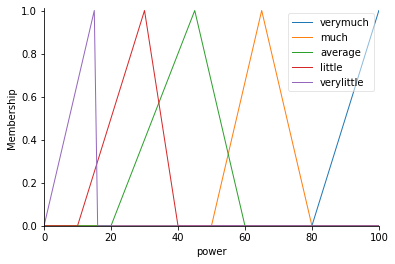

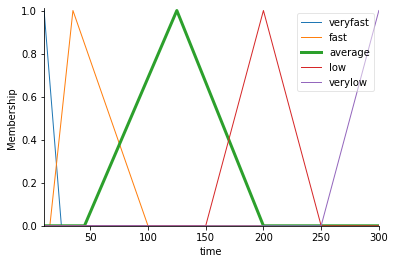

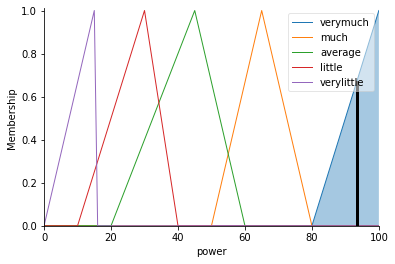

In [45]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
time=ctrl.Antecedent(np.arange(10,301,1),'time')
rice=ctrl.Antecedent(np.arange(100,2001,1),'rice')
power=ctrl.Consequent(np.arange(0,101,1),'power')
time['veryfast']=fuzz.trimf(time.universe,[10,10,25])
time['fast']=fuzz.trimf(time.universe,[15,35,100])
time['average']=fuzz.trimf(time.universe,[45,125,200])
time['low']=fuzz.trimf(time.universe,[150,200,250])
time['verylow']=fuzz.trimf(time.universe,[250,300,300])

rice['verymuch']=fuzz.trimf(rice.universe,[1700,2000,2000])
rice['much']=fuzz.trimf(rice.universe,[800,1200,1700])
rice['average']=fuzz.trimf(rice.universe,[300,850,1500])
rice['little']=fuzz.trimf(rice.universe,[200,400,700])
rice['verylittle']=fuzz.trimf(rice.universe,[100,100,200])

power['verymuch']=fuzz.trimf(power.universe,[80,100,100])
power['much']=fuzz.trimf(power.universe,[50,65,80])
power['average']=fuzz.trimf(power.universe,[20,45,60])
power['little']=fuzz.trimf(power.universe,[10,30,40])
power['verylittle']=fuzz.trimf(power.universe,[0,15,15])

time.view()
rice.view()
power.view()
time['average'].view()

rule1=ctrl.Rule(time['veryfast']&rice['verymuch'], power['verymuch'])
rule2=ctrl.Rule(time['veryfast']&rice['much'], power['verymuch'])
rule3=ctrl.Rule(time['veryfast']&rice['average'], power['much'])
rule4=ctrl.Rule(time['veryfast']&rice['little'], power['average'])
rule5=ctrl.Rule(time['veryfast']&rice['verylittle'], power['little'])

rule6=ctrl.Rule(time['fast']&rice['verymuch'], power['verymuch'])
rule7=ctrl.Rule(time['fast']&rice['much'], power['much'])
rule8=ctrl.Rule(time['fast']&rice['average'], power['average'])
rule9=ctrl.Rule(time['fast']&rice['little'], power['little'])
rule10=ctrl.Rule(time['fast']&rice['verylittle'], power['verylittle'])

rule11=ctrl.Rule(time['average']&rice['verymuch'], power['much'])
rule12=ctrl.Rule(time['average']&rice['much'], power['average'])
rule13=ctrl.Rule(time['average']&rice['average'], power['average'])
rule14=ctrl.Rule(time['average']&rice['little'], power['little'])
rule15=ctrl.Rule(time['average']&rice['verylittle'], power['verylittle'])

rule16=ctrl.Rule(time['low']&rice['verymuch'], power['much'])
rule17=ctrl.Rule(time['low']&rice['much'], power['average'])
rule18=ctrl.Rule(time['low']&rice['average'], power['little'])
rule19=ctrl.Rule(time['low']&rice['little'], power['little'])
rule20=ctrl.Rule(time['low']&rice['verylittle'], power['verylittle'])

rule21=ctrl.Rule(time['verylow']&rice['verymuch'], power['average'])
rule22=ctrl.Rule(time['verylow']&rice['much'], power['little'])
rule23=ctrl.Rule(time['verylow']&rice['average'], power['little'])
rule24=ctrl.Rule(time['verylow']&rice['little'], power['verylittle'])
rule25=ctrl.Rule(time['verylow']&rice['verylittle'], power['verylittle'])

power_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25])
pow=ctrl.ControlSystemSimulation(power_ctrl)
pow.input['time']=10
pow.input['rice']=2000
pow.compute()
print(pow.output['power'])
power.view(sim=pow)





